In [1]:
import pandas as pd
data=pd.read_csv('03_2010_ 1333 variables.csv')

In [2]:
data[data.Date<'2012-01-01'].shape

(35064, 1343)

In [3]:
data = data.drop('Unnamed: 0',axis=1)

In [4]:
box=pd.read_csv('04_Box_Cox_load.csv',index_col=False)

In [5]:
box=box.drop('Unnamed: 0',axis=1)

In [6]:
box.index=pd.Int64Index(box.index)

In [7]:
data.index=pd.Int64Index(data.index)

In [8]:
box_data=pd.merge(data, box, left_on=data.index,right_on=box.index,how='left')

In [9]:
box_data = box_data.drop('key_0',axis=1)

In [10]:
box_data[box_data['Date']>='2011-12-31']

,Date,Hour,Temperature,Load,trend,month,weekday,holiday,TempDistance,Temp.51.7.,...,NightTime.TemperatureLag24,NightTime.Temperature_Lag24_2,NightTime.Temperature_Lag24_3,NightTime.TemperatureLag48,NightTime.Temperature_Lag48_2,NightTime.Temperature_Lag48_3,NightTime.Temperature.2,NightTime.Temperature.3,NightTime.Temperature.1.2,box
35040,2011-12-31,1,35.33,9970.0,35041,December,Saturday,0,16.37,0,...,32.67,1067.3289,34869.635163,31.33,981.5689,30752.553637,1248.2089,44099.220437,5.943904,33.788346
35041,2011-12-31,2,34.67,9428.0,35042,December,Saturday,0,17.03,0,...,34.33,1178.5489,40459.583737,33.00,1089.0000,35937.000000,1202.0089,41673.648563,5.888124,33.282733
35042,2011-12-31,3,33.67,9059.0,35043,December,Saturday,0,18.03,0,...,35.33,1248.2089,44099.220437,33.67,1133.6689,38170.631863,1133.6689,38170.631863,5.802586,32.925719
35043,2011-12-31,4,32.33,8817.0,35044,December,Saturday,0,19.37,0,...,37.00,1369.0000,50653.000000,34.33,1178.5489,40459.583737,1045.2289,33792.250337,5.685948,32.685532
35044,2011-12-31,5,30.67,8743.0,35045,December,Saturday,0,21.03,0,...,37.33,1393.5289,52020.433837,34.00,1156.0000,39304.000000,940.6489,28849.701763,5.538050,32.611087
35045,2011-12-31,6,30.33,8735.0,35046,December,Saturday,0,21.37,0,...,39.00,1521.0000,59319.000000,34.00,1156.0000,39304.000000,919.9089,27900.836937,5.507268,32.603010
35046,2011-12-31,7,29.67,8993.0,35047,December,Saturday,0,22.03,0,...,0.00,0.0000,0.000000,0.00,0.0000,0.000000,0.0000,0.000000,0.000000,32.860702
35047,2011-12-31,8,29.67,9363.0,35048,December,Saturday,0,22.03,0,...,0.00,0.0000,0.000000,0.00,0.0000,0.000000,0.0000,0.000000,0.000000,33.220625
35048,2011-12-31,9,32.00,9545.0,35049,December,Saturday,0,19.70,0,...,0.00,0.0000,0.000000,0.00,0.0000,0.000000,0.0000,0.000000,0.000000,33.393714
35049,2011-12-31,10,34.00,9676.0,35050,December,Saturday,0,17.70,0,...,0.00,0.0000,0.000000,0.00,0.0000,0.000000,0.0000,0.000000,0.000000,33.516753


In [11]:
box_data.columns.values

array(['Date', 'Hour', 'Temperature', ..., 'NightTime.Temperature.3',
       'NightTime.Temperature.1.2', 'box'], dtype=object)

In [12]:
box_data['Load_BoxCox']=box_data['box']

In [13]:
box_data = box_data.drop('box',axis=1)

In [14]:
sum(data.isnull().sum()>12)

337

In [15]:
train_set = box_data[box_data['Date']<'2011-01-01']
test_set = box_data[(box_data['Date']>='2011-01-01') & (box_data['Date']<'2012-01-01')]

In [16]:
train_set=train_set.dropna()

In [21]:
X_train_set = train_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day'],axis=1).values
Y_train_set = train_set['Load_BoxCox'].values

X_test_set = test_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day'],axis=1).values
Y_test_set = test_set['Load_BoxCox'].values

# X_train_set = train_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week'],axis=1).values
# Y_train_set = train_set['Load_BoxCox'].values

# X_test_set = test_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week'],axis=1).values
# Y_test_set = test_set['Load_BoxCox'].values

In [33]:
tset=train_set.drop(['Load_BoxCox','Load','Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day'],axis=1)

In [34]:
tset.shape

(26256, 1333)

In [24]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.feature_selection import RFECV

In [25]:
# # params = {'n_estimators':100, 'max_depth':8, 'min_samples_split':500, 'min_sample_leaf':50,'learning_rate':.2, 
# #                 'loss':'ls'}
# GB = GradientBoostingRegressor()
# model = GB

# rfecv = RFECV(estimator=model, step=1, verbose=0)
# rfecv.fit(X_train_set, Y_train_set)

# var_ranking = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), significant)),
#                             columns = ['ranking', 'variable'])
# pd.options.display.max_rows = 150
# print(var_ranking)

In [26]:
# var_selected=var_ranking[var_ranking.ranking==1]
# print(var_selected)

In [27]:
def custom_asymmetric_train(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    grad = np.where(residual<0, -2*10.0*residual, -2*residual)
    hess = np.where(residual<0, 2*10.0, 2.0)
    return grad, hess

def custom_asymmetric_valid(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    loss = np.where(residual < 0, (residual**2)*10.0, residual**2) 
    return "custom_asymmetric_eval", np.mean(loss), False

In [29]:
import lightgbm
# default lightgbm model with sklearn api
import numpy as np

gbm = lightgbm.LGBMRegressor() 

# updating objective function to custom
# default is "regression"
# also adding metrics to check different scores
gbm.set_params(**{'objective': custom_asymmetric_train}, metrics = ["mape"])

# fitting model 
gbm.fit(
    X_train_set,
    Y_train_set,
#     eval_set=[(X_test_set, Y_test_set)],
    eval_metric=custom_asymmetric_valid,
    verbose=False,
)

y_pred = gbm.predict(X_test_set)


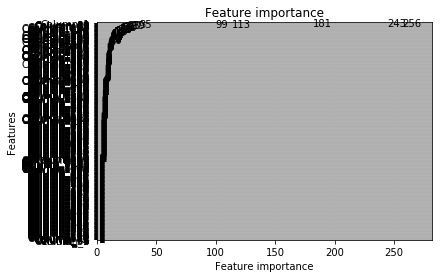

In [30]:
import matplotlib.pyplot as plt
lightgbm.plot_importance(gbm,height=0.2)
plt.show()

importance_type (string, optional (default="split")) – How the importance is calculated. If “split”, result contains numbers of times the feature is used in a model. If “gain”, result contains total gains of splits which use the feature.

In [35]:
# gbm.feature_importances_
var_rank=pd.DataFrame(tset.columns.values,columns=['Var_Name'])

In [36]:
rank=pd.Series(gbm.feature_importances_)
var_rank['rank']=rank

In [37]:
var_rank = var_rank.sort_values(by='rank',ascending=False)

In [38]:
var_rank=var_rank.reset_index().drop('index',axis=1)

In [39]:
var_rank[var_rank['rank']==0].Var_Name.values

array(['DayTime.temp_max_6', 'DayTime.Temperature.1.2',
       'NightTime.TempDistance_Lag6_2', 'DayTime.Temperature.3',
       'DayTime.Temperature.2', 'holiday.Temperature_Lag4_3',
       'Temp.51.7..TempDistanceLag2', 'DayTime.TempDistance_Lag12_2',
       'Temp.51.7..temp_mean_24_0.5', 'Temp.51.7..temp_mean_12_3',
       'Temp.51.7..temp_mean_12_2', 'DayTime.Temperature_Lag48_3',
       'Temp.51.7..temp_mean_12_0.5', 'Temp.51.7..temp_mean_6_0.5',
       'Temp.51.7..temp_mean_6_3', 'Temp.51.7..temp_std_12_0.5',
       'NightTime.TempDistance_Lag5_0.5', 'Temp.51.7..temp_min_24_2',
       'DayTime.TempDistance_Lag12_0.5', 'Temp.51.7..temp_min_24_3',
       'Temp.51.7..temp_std_6_0.5', 'Temp.51.7..temp_std_6_2',
       'holiday.TemperatureLag5', 'Temp.51.7..temp_std_6_3',
       'Temp.51.7..temp_std_12_2', 'Temp.51.7..temp_mean_6_2',
       'Temp.51.7..temp_std_12_3', 'Temp.51.7..TempDistance_Lag2_0.5',
       'Temp.51.7..TempDistance_Lag2_2', 'Temp.51.7..temp_std_24_0.5',
       'Temp

In [40]:
new_selected_features_df = var_rank[var_rank['rank']>0]

In [41]:
new_selected_features_df.shape

(595, 2)

In [42]:
y_pred
y_pred_t = pd.Series(y_pred)

In [43]:
y_pred_t

0       33.314798
1       32.902112
2       32.550124
3       32.680463
4       32.614696
5       32.855752
6       32.908118
7       33.698028
8       33.992027
9       34.452704
10      35.043495
11      35.171299
12      35.171299
13      35.199667
14      35.250116
15      35.172852
16      35.147962
17      35.448436
18      36.146692
19      36.218626
20      35.907577
21      35.875247
22      35.711186
23      35.270945
24      34.999068
25      34.583070
26      34.255152
27      34.028849
28      34.012259
29      33.938251
          ...    
8730    35.580483
8731    35.670642
8732    35.544153
8733    35.444467
8734    34.945441
8735    34.820002
8736    33.389448
8737    33.033619
8738    32.942010
8739    32.824910
8740    33.040145
8741    33.131019
8742    33.197789
8743    33.608650
8744    33.694843
8745    33.912074
8746    34.145798
8747    34.255915
8748    34.134638
8749    34.138974
8750    34.131299
8751    34.095903
8752    34.024916
8753    34.330452
8754    34

In [44]:
df=pd.DataFrame(Y_test_set,columns=['Test_Y'])
df['Pred_Y_Test']=y_pred

In [45]:
y_train_fit = gbm.predict(X_train_set)
y_pred_train = pd.Series(y_train_fit)

In [46]:
y_pred_train

0        35.786228
1        35.587302
2        35.268038
3        35.024154
4        35.081678
5        35.364799
6        35.888911
7        36.780177
8        37.036461
9        37.219733
10       37.211237
11       37.106159
12       37.074439
13       37.007613
14       36.918512
15       36.854257
16       36.874968
17       37.136243
18       37.671941
19       37.539026
20       37.495654
21       37.397214
22       36.826168
23       36.336379
24       35.346567
25       35.150216
26       34.657713
27       34.580872
28       34.522375
29       34.761653
           ...    
26226    35.884617
26227    35.807374
26228    35.779022
26229    35.721245
26230    35.158606
26231    34.285439
26232    33.712552
26233    33.006334
26234    32.519038
26235    32.480628
26236    32.202467
26237    32.273220
26238    32.489034
26239    33.312209
26240    33.761292
26241    34.298341
26242    34.266989
26243    34.314536
26244    34.300124
26245    34.300124
26246    34.344794
26247    34.

In [47]:
df_t=pd.DataFrame(Y_train_set,columns=['Train_Y'])

In [48]:
df_t

,Train_Y
0,36.003434
1,35.533876
2,35.281840
3,35.141221
4,35.146125
5,35.329435
6,35.821265
7,36.614331
8,37.003447
9,37.096300


In [49]:
df_t['Pred_Y_Train']=y_pred_train

In [50]:
df

,Test_Y,Pred_Y_Test
0,33.470880,33.314798
1,33.129259,32.902112
2,32.874523,32.550124
3,32.605030,32.680463
4,32.556459,32.614696
5,32.573684,32.855752
6,32.807236,32.908118
7,33.079915,33.698028
8,33.279874,33.992027
9,33.506470,34.452704


In [51]:
df.to_csv('test_result.csv')
df_t.to_csv('train_result.csv')